In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.metrics import precision_score,recall_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import statsmodels.api as sm

import tensorflow as tf
import keras

from keras.models import Sequential,load_model

In [5]:
import os
import math
import random

import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import activations

In [6]:
from keras.models import Sequential,load_model
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam,SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font",family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"]=False



from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.metrics import precision_score,recall_score


from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

import mglearn
from sklearn.datasets import load_breast_cancer,load_boston,load_iris,make_moons,load_digits
from sklearn.datasets import load_diabetes,load_wine 


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

#conda install -c anaconda py-xgboost
import xgboost as xgb
from xgboost import XGBClassifier,XGBRegressor
from xgboost import plot_importance,plot_tree

# pip inastall lightgbbm
from lightgbm import LGBMClassifier,LGBMRegressor
from lightgbm import plot_importance,plot_tree,plot_metric
import statsmodels.api as sm

import os
os.environ["PATH"]+=os.pathsep +"C:/Program Files/Graphviz/bin"
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import mean_squared_error

In [9]:
train_1 = pd.read_csv("data/lunch_df_encoding.csv")
train_2 = pd.read_csv("data/dinner_df_encoding.csv")
test_1 = pd.read_csv("data/lunch_test_encoding.csv")
test_2 = pd.read_csv("data/dinner_test_encoding.csv")

## 1. LSTM 딥러닝 

### (1) 점심데이터 불러오기 

In [56]:
train_1 = train_1.dropna()
X = train_1.drop(columns=["lunch_number","datetime"],axis=1)
y = train_1["lunch_number"]
X
y
y

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(X_train.shape, X_test.shape)

(902, 28) (301, 28)


In [57]:
X_train = X_train.values
X_test= X_test.values
y_train = y_train.values
y_test = y_test.values
 

print(X_train.shape)
print(y_train.shape)

(902, 28)
(902,)


### (2) LSTM 형식에 맞도록 데이터 변환 

In [71]:
X_train_t = X_train.reshape(X_train.shape[0], 28, 1)
X_test_t = X_test.reshape(X_test.shape[0], 28, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(902, 28, 1)
[[[1.200e+01]
  [7.000e+00]
  [2.846e+03]
  ...
  [0.000e+00]
  [1.000e+00]
  [0.000e+00]]

 [[7.000e+00]
  [2.500e+01]
  [2.643e+03]
  ...
  [0.000e+00]
  [1.000e+00]
  [0.000e+00]]

 [[7.000e+00]
  [2.400e+01]
  [2.839e+03]
  ...
  [0.000e+00]
  [1.000e+00]
  [0.000e+00]]

 ...

 [[7.000e+00]
  [8.000e+00]
  [2.760e+03]
  ...
  [0.000e+00]
  [1.000e+00]
  [0.000e+00]]

 [[5.000e+00]
  [1.100e+01]
  [2.721e+03]
  ...
  [0.000e+00]
  [1.000e+00]
  [0.000e+00]]

 [[1.100e+01]
  [2.600e+01]
  [2.815e+03]
  ...
  [0.000e+00]
  [1.000e+00]
  [0.000e+00]]]
[353 584 486 541 397 522 666 573 505 407 540 414 343 426 482 425 372 318
 394 550 566 561 430 316 412 373 594 625 498 494 423 429 529 519 403 352
 425 598 671 516 463 478 564 503 512 484 483 411 350 542 533 441 632 579
 165 648 473 589 521 569 434 413 583 396 389 381 625 463 410 396 513 432
 276   0 505 442 375 453 477 557   0 523 380 446 446 464 423 571 653 532
 436 411 429 334   0 482 556 630 353   0 507 335 448 531

### (3) 모델구현 

In [59]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(28, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


### (4) 훈련

In [60]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100
31/31 [==============================] - 2s 12ms/step - loss: 843149.4375
Epoch 2/100
31/31 [==============================] - 0s 12ms/step - loss: 840343.9375
Epoch 3/100
31/31 [==============================] - 0s 13ms/step - loss: 836511.9375
Epoch 4/100
31/31 [==============================] - 0s 11ms/step - loss: 833347.3125
Epoch 5/100
31/31 [==============================] - 0s 11ms/step - loss: 830990.0000
Epoch 6/100
31/31 [==============================] - 0s 12ms/step - loss: 829167.6875
Epoch 7/100
31/31 [==============================] - 0s 12ms/step - loss: 827567.4375
Epoch 8/100
31/31 [==============================] - 0s 12ms/step - loss: 826091.9375
Epoch 9/100
31/31 [==============================] - 0s 11ms/step - loss: 824667.6250
Epoch 10/100
31/31 [==============================] - 0s 12ms/step - loss: 823291.8125
Epoch 11/100
31/31 [==============================] - 0s 12ms/step - loss: 821949.5625
Epoch 12/100
31/31 [==============================] 

### (5) 훈련 결과 시각화  

+ 실제값과 오차가 상당함 ㅠㅠ 

Text(0.5, 1.0, 'Prices vs Predicted price Index')

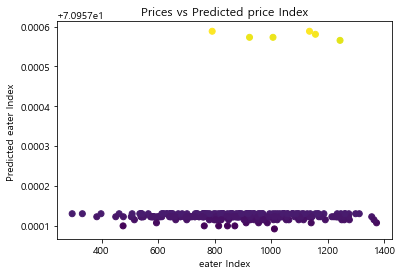

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt


y_pred = model.predict(X_test_t, batch_size=32)
plt.scatter(y_test, y_pred , c=y_pred)
plt.xlabel("eater Index")
plt.ylabel("Predicted eater Index ")
plt.title("Prices vs Predicted price Index")

### (1) 석식 데이터 불러오기 

In [63]:
train_2 = train_2.dropna()

X = train_2.drop(columns=["dinner_number","datetime"],axis=1)
y = train_2["dinner_number"]
X
y
y

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(X_train.shape, X_test.shape)

(902, 28) (301, 28)


In [64]:
X_train = X_train.values
X_test= X_test.values
y_train = y_train.values
y_test = y_test.values
 

print(X_train.shape)
print(y_train.shape)

(902, 28)
(902,)


### (2) LSTM 형식에 맞도록 데이터 변환 

In [65]:
X_train_t = X_train.reshape(X_train.shape[0], 28, 1)
X_test_t = X_test.reshape(X_test.shape[0], 28, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(902, 28, 1)
[[[1.200e+01]
  [7.000e+00]
  [2.846e+03]
  ...
  [0.000e+00]
  [1.000e+00]
  [0.000e+00]]

 [[7.000e+00]
  [2.500e+01]
  [2.643e+03]
  ...
  [0.000e+00]
  [1.000e+00]
  [0.000e+00]]

 [[7.000e+00]
  [2.400e+01]
  [2.839e+03]
  ...
  [0.000e+00]
  [1.000e+00]
  [0.000e+00]]

 ...

 [[7.000e+00]
  [8.000e+00]
  [2.760e+03]
  ...
  [0.000e+00]
  [1.000e+00]
  [0.000e+00]]

 [[5.000e+00]
  [1.100e+01]
  [2.721e+03]
  ...
  [0.000e+00]
  [1.000e+00]
  [0.000e+00]]

 [[1.100e+01]
  [2.600e+01]
  [2.815e+03]
  ...
  [0.000e+00]
  [1.000e+00]
  [0.000e+00]]]
[353 584 486 541 397 522 666 573 505 407 540 414 343 426 482 425 372 318
 394 550 566 561 430 316 412 373 594 625 498 494 423 429 529 519 403 352
 425 598 671 516 463 478 564 503 512 484 483 411 350 542 533 441 632 579
 165 648 473 589 521 569 434 413 583 396 389 381 625 463 410 396 513 432
 276   0 505 442 375 453 477 557   0 523 380 446 446 464 423 571 653 532
 436 411 429 334   0 482 556 630 353   0 507 335 448 531

### (3) 모델구현 

In [66]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(28, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


### (4) 훈련

In [67]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100
31/31 [==============================] - 2s 11ms/step - loss: 233817.6875
Epoch 2/100
31/31 [==============================] - 0s 12ms/step - loss: 232088.1875
Epoch 3/100
31/31 [==============================] - 0s 13ms/step - loss: 230078.2969
Epoch 4/100
31/31 [==============================] - 0s 12ms/step - loss: 228554.0781
Epoch 5/100
31/31 [==============================] - 0s 15ms/step - loss: 227399.7344
Epoch 6/100
31/31 [==============================] - 0s 13ms/step - loss: 226476.8438
Epoch 7/100
31/31 [==============================] - 0s 14ms/step - loss: 225649.7188
Epoch 8/100
31/31 [==============================] - 1s 16ms/step - loss: 224889.8125
Epoch 9/100
31/31 [==============================] - 0s 12ms/step - loss: 224166.8750
Epoch 10/100
31/31 [==============================] - 0s 12ms/step - loss: 223474.2344
Epoch 11/100
31/31 [==============================] - 0s 12ms/step - loss: 222798.4531
Epoch 12/100
31/31 [==============================] 

### (5) 훈련시각화 
+ 이것도 오차가 많이 남 ㅠㅠ 

Text(0.5, 1.0, 'Prices vs Predicted price Index')

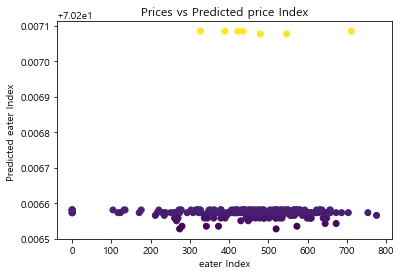

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt


y_pred = model.predict(X_test_t, batch_size=32)
plt.scatter(y_test, y_pred , c=y_pred)
plt.xlabel("eater Index")
plt.ylabel("Predicted eater Index ")
plt.title("Prices vs Predicted price Index")